In [47]:
# https://www.wolframalpha.com/input?i2d=true&i=%7B%7B1%2C4%2C8%2C5%7D%2C%7B0.25%2C1%2C7%2C8%7D%2C%7B0.125%2C0.14285714%2C1%2C8%7D%2C%7B0.2%2C0.125%2C0.125%2C1%7D%7D
import numpy as np
import random
np.random.seed(42)
random.seed(42)
dims = 5

#M = np.random.randint(9, size=(dims, dims))+1
#print(M)

possible_vals = [1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1, 2 ,3 ,4 ,5 ,6 ,7 , 8, 9]


def reciprocal(dims):

    #M = Matrix.astype(float)
    M = np.zeros((dims, dims))

    for i in range(M.shape[0]):

        
        for j in range(M.shape[1]):
            M[i,j] = random.choice(possible_vals)
            M[j,i] =M[i,j]
            M[j,i] = float(1/M[i,j])
        M[i,i] = 1

    return M

print(reciprocal(dims))


def calc_CI(max_eig_val, dim):
    return (max_eig_val-dim)/(dim-1)

# Test random matrix
calc_CI(6.37, 5)

[[1.         5.         9.         9.         1.        ]
 [0.2        1.         7.         3.         9.        ]
 [0.11111111 0.14285714 1.         0.16666667 4.        ]
 [0.11111111 0.33333333 6.         1.         0.16666667]
 [1.         0.11111111 0.25       6.         1.        ]]


0.3425

In [48]:
# Perform eigendecomposition on covariance matrix
# Source: https://www.districtdatalabs.com/principal-component-analysis-with-python

RM = reciprocal(dims)

eig_vals, eig_vecs = np.linalg.eig(RM)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


max_eig_val = max(eig_vals)
max_eig_val

Eigenvectors 
[[-0.87149631+0.j          0.88028318+0.j          0.88028318-0.j
   0.16032715-0.11930259j  0.16032715+0.11930259j]
 [-0.29560994+0.j         -0.2643489 +0.22990775j -0.2643489 -0.22990775j
   0.6897949 +0.j          0.6897949 -0.j        ]
 [-0.16770744+0.j         -0.06253177-0.19937303j -0.06253177+0.19937303j
  -0.07242516+0.07053011j -0.07242516-0.07053011j]
 [-0.33824013+0.j          0.10688196+0.20597348j  0.10688196-0.20597348j
  -0.65493251+0.16772258j -0.65493251-0.16772258j]
 [-0.10284347+0.j         -0.0428709 +0.05492754j -0.0428709 -0.05492754j
  -0.04122714-0.12352347j -0.04122714+0.12352347j]]

Eigenvalues 
[ 7.22768636+0.j         -0.712821  +3.73881499j -0.712821  -3.73881499j
 -0.40102218+0.55670467j -0.40102218-0.55670467j]
Eigenvalues in descending order:
7.227686360837262
3.8061596564273557
3.8061596564273557
0.6861041288873513
0.6861041288873513


np.complex128(7.227686360837262+0j)

In [49]:
N = 5000
max_dim = 15

stored_CIs = np.zeros((N,max_dim))
print(stored_CIs.shape)


for i in range(N):
    for dim in range(2,max_dim):


        M = reciprocal(dim)

        #Perform eigendecomposition on matrix
        eig_vals, eig_vecs = np.linalg.eig(M)
        #print(eig_vals)
        max_eig_val = max(eig_vals)

        CI = calc_CI(max_eig_val, dim)

        stored_CIs[i, dim] = CI



print(stored_CIs[0])




(5000, 15)


/var/folders/97/v5lvp9nx3ks37kdf8m7qgyl80000gp/T/ipykernel_31518/2638043845.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  stored_CIs[i, dim] = CI


[0.         0.         0.         0.21784457 0.43410419 0.99027449
 1.54716461 1.0266081  1.5480433  1.03606738 1.32094849 1.34773667
 1.41546017 1.51293354 1.37070099]


In [50]:
# Compute averages

givenRI = [0, 0, 0.52, 0.89, 1.11 ,1.25,1.35,1.40,1.45,1.49,1.52,1.54,1.56,1.58,1.59]

CI_avg = np.mean(stored_CIs, axis=0)
print("Avg CI", CI_avg)
CI_avg= np.nan_to_num(CI_avg) 
print("Avg CI", CI_avg)

RI_avg = np.nan_to_num(givenRI) 
print("Avg RI", RI_avg)

Avg CI [0.         0.         0.         0.5153456  0.90450553 1.11711183
 1.24734851 1.33533804 1.40124054 1.44952279 1.48614366 1.52025672
 1.53478422 1.55661397 1.56898911]
Avg CI [0.         0.         0.         0.5153456  0.90450553 1.11711183
 1.24734851 1.33533804 1.40124054 1.44952279 1.48614366 1.52025672
 1.53478422 1.55661397 1.56898911]
Avg RI [0.   0.   0.52 0.89 1.11 1.25 1.35 1.4  1.45 1.49 1.52 1.54 1.56 1.58
 1.59]


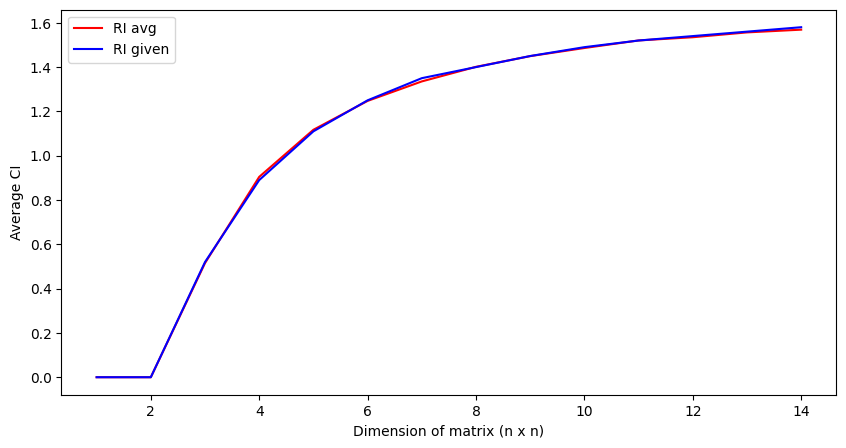

In [51]:
import matplotlib.pyplot as plt
#Plot given RIs against generated ones

fix, ax = plt.subplots(figsize =(10,5))

X = np.linspace(1,14, 14)

plt.plot(X,CI_avg[1:], color = 'red', label = 'RI avg')
plt.plot(X,givenRI[:-1], color = 'blue', label = 'RI given')
ax.set_xlabel("Dimension of matrix (n x n)")
ax.set_ylabel("Average CI")
ax.legend()


In [52]:
# Cost function

import numpy as np
import random
import math

MM = np.matrix('[1.     1         0   1        1       ;0 1.         1        0 0;  1         0 1.         1         0     ;  0 1        0 1.         1.        ;  0 1         1         0      1       ')

print(MM)


def cost_function(M):
    for i in range(M.shape[0]):        
        for j in range(M.shape[1]):
            if M[i,j] !=0:
                M[j,i] = dist(j,i, i, j)
            else:
                M[j,i] =0
        M[i,i] = 0

    return M.sum().sum()
    
def dist(x1,x2,y1,y2):
    return math.hypot(x2 - x1, y2 - y1)

MMM = cost_function(MM)

MMM
#MMM + MM

[[1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1.]]


np.float64(31.112698372208094)